In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [4]:
import os 
os.listdir('/kaggle/input/')

['turn-right',
 'two-way',
 'no-entry',
 'slowimg',
 'bicycle-crossing',
 'double-curve',
 'road-construction',
 'gtsrb-german-traffic-sign',
 'no-turnining',
 'gwedfw',
 'stop-image-to-test']

In [5]:
os.listdir('/kaggle/input/gtsrb-german-traffic-sign')

['Meta',
 'meta',
 'Meta.csv',
 'Train.csv',
 'Test.csv',
 'Test',
 'test',
 'Train',
 'train']

In [6]:
train_data=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')

In [7]:
train_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [8]:
print(train_data.shape)


(39209, 8)


In [9]:
# read each image inside the path store the image in images and the labels in labels 
import  cv2
import numpy as np
images = []
labels = []

for index, row in train_data.iterrows():
    img_path = os.path.join("../input/gtsrb-german-traffic-sign", row['Path'])
    img = cv2.imread(img_path)        # Read image (BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (32,32))    # Resize to fixed size
    images.append(img)
    labels.append(row['ClassId'])

images = np.array(images)
labels = np.array(labels)


In [10]:
# new training data 
images.shape

(39209, 32, 32, 3)

In [11]:
labels.shape

(39209,)

In [12]:
images[0].max()

116

In [13]:
images=images/255

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size = 0.2, random_state = 0)
print('Training sample sape for Image Data: ' + str(x_train.shape))
print('Testing sample sape for Image Data: ' + str(x_test.shape))
print('Training sample sape for Labels Data: ' + str(y_train.shape))
print('Testing sample sape for Labels Data: ' + str(y_test.shape))

Training sample sape for Image Data: (31367, 32, 32, 3)
Testing sample sape for Image Data: (7842, 32, 32, 3)
Training sample sape for Labels Data: (31367,)
Testing sample sape for Labels Data: (7842,)


In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [16]:
import tensorflow as tf 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
])




I0000 00:00:1758551392.940765      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758551392.941429      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       128,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,359 (2.18 MB)

 Trainable params: 571,359 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define callback
early_stop = EarlyStopping(
    monitor='val_loss',   # you can also use 'val_accuracy'
    patience=5,           # wait 5 epochs after no improvement
    restore_best_weights=True, # roll back to best weights
    verbose=1
)


# Train with callback
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/50


I0000 00:00:1758551399.268393     100 service.cc:148] XLA service 0x7a02200114c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758551399.269749     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758551399.269768     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758551399.770436     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 41/491 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0351 - loss: 3.6809

I0000 00:00:1758551403.896006     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.1853 - loss: 2.9816 - val_accuracy: 0.6764 - val_loss: 1.0634
Epoch 2/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7418 - loss: 0.8039 - val_accuracy: 0.9039 - val_loss: 0.3321
Epoch 3/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9224 - loss: 0.2597 - val_accuracy: 0.9449 - val_loss: 0.1881
Epoch 4/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9586 - loss: 0.1427 - val_accuracy: 0.9758 - val_loss: 0.0843
Epoch 5/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9738 - loss: 0.0909 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 6/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9746 - val_loss: 0.0932
Epoch 7/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9892 - val_loss: 0.0507
Epoch 8/50
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0295 - val_accuracy: 0.9855 - va

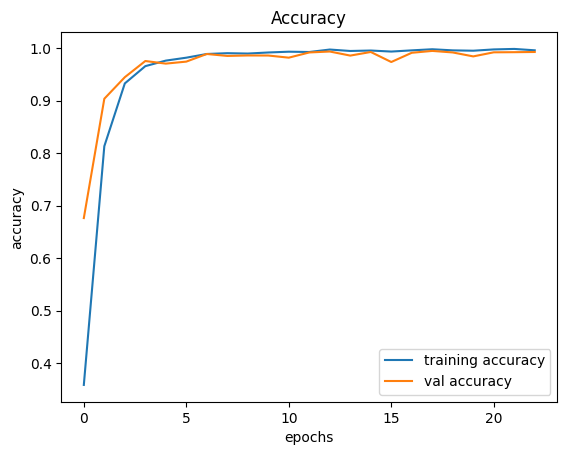

In [20]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

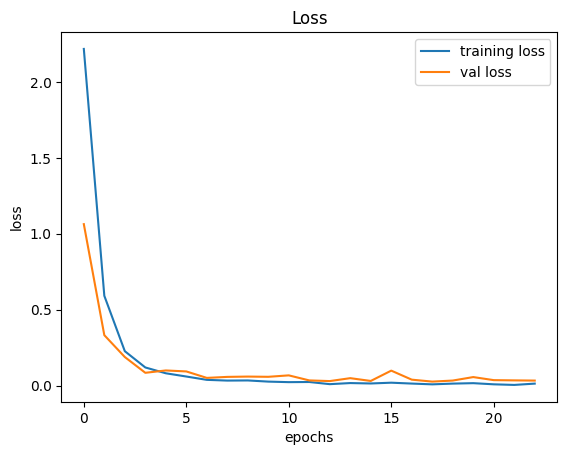

In [21]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9950 - loss: 0.0261
Test accuracy: 0.9950267672538757


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


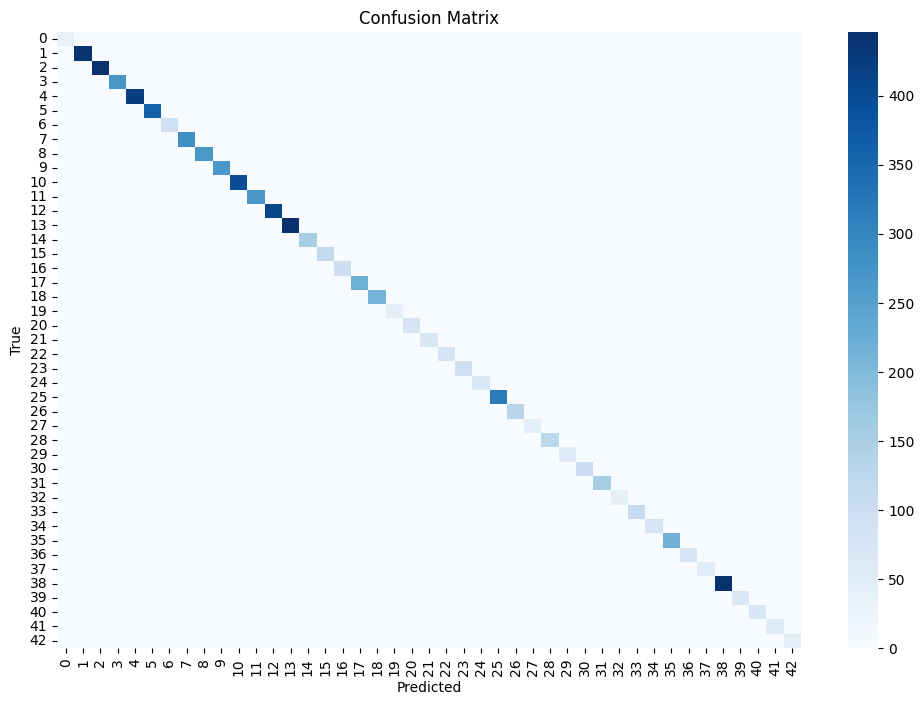

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




In [24]:
model.save("traffic_sign_cnn.h5")


In [25]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/kaggle/working/traffic_sign_cnn.h5")



In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [27]:
def predict_traffic_sign(img_path, model, signnames):
    # Load and preprocess image
    img = cv2.imread(img_path)                       
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)       
    img_resized = cv2.resize(img, (32, 32)) / 255.0  
    img_input = np.expand_dims(img_resized, axis=0)  
    
    # Prediction
    pred = model.predict(img_input)
    class_id = np.argmax(pred)
    class_name = signnames[class_id]
    
    # Show image with title
    plt.imshow(img)
    plt.title(f"Prediction: {class_name}")
    plt.axis("off")
    plt.show()
    
    print(f"Predicted Class ID: {class_id}")
    print(f"Predicted Class Name: {class_name}")
    return class_id, class_name



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


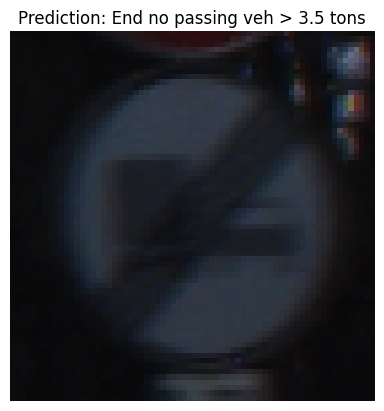

Predicted Class ID: 42
Predicted Class Name: End no passing veh > 3.5 tons


(42, 'End no passing veh > 3.5 tons')

In [28]:
predict_traffic_sign(img_path, model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


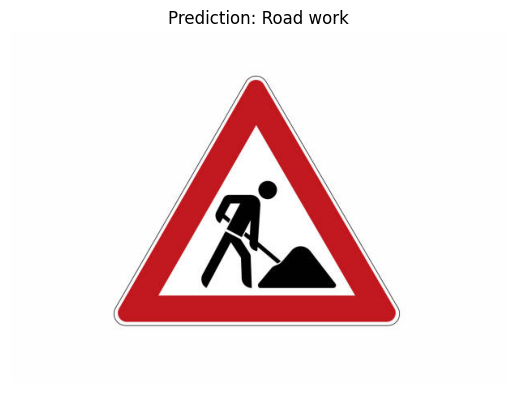

Predicted Class ID: 25
Predicted Class Name: Road work


(25, 'Road work')

In [29]:
predict_traffic_sign("/kaggle/input/road-construction/road_constructon.jpg", model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


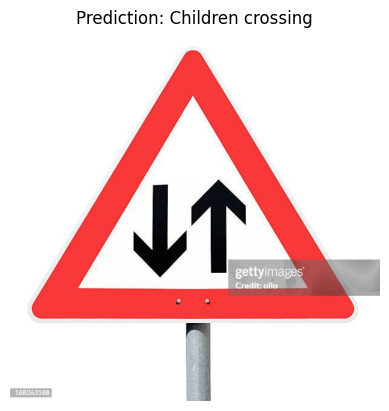

Predicted Class ID: 28
Predicted Class Name: Children crossing


(28, 'Children crossing')

In [30]:
predict_traffic_sign('/kaggle/input/two-way/two_way.jpg', model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


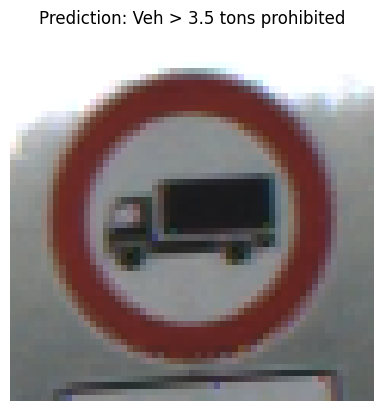

Predicted Class ID: 16
Predicted Class Name: Veh > 3.5 tons prohibited


(16, 'Veh > 3.5 tons prohibited')

In [31]:
predict_traffic_sign('/kaggle/input/gwedfw/00016_00000_00007.png', model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


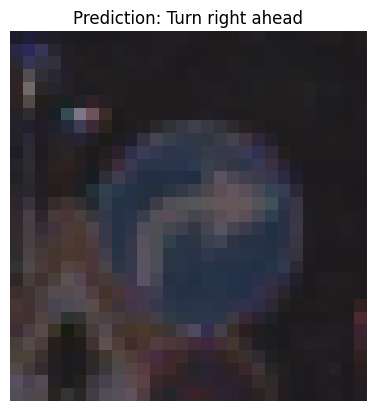

Predicted Class ID: 33
Predicted Class Name: Turn right ahead


(33, 'Turn right ahead')

In [33]:
predict_traffic_sign('/kaggle/input/turn-right/turn right.png', model, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


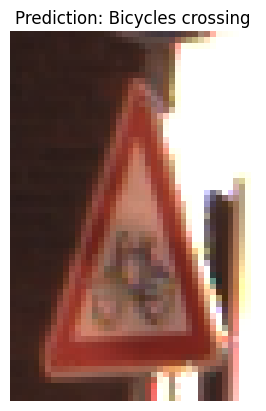

Predicted Class ID: 29
Predicted Class Name: Bicycles crossing


(29, 'Bicycles crossing')

In [34]:
predict_traffic_sign("/kaggle/input/bicycle-crossing/bicycle-crossing.png",model,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


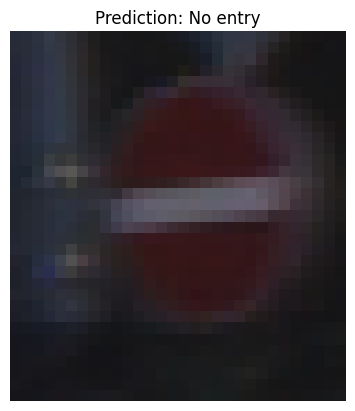

Predicted Class ID: 17
Predicted Class Name: No entry


(17, 'No entry')

In [35]:
predict_traffic_sign('/kaggle/input/no-entry/No entry.png',model,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


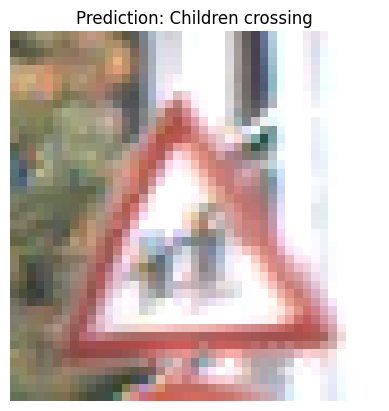

Predicted Class ID: 28
Predicted Class Name: Children crossing


(28, 'Children crossing')

In [36]:
predict_traffic_sign('/kaggle/input/childrens/childern_crossing.png',model,classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


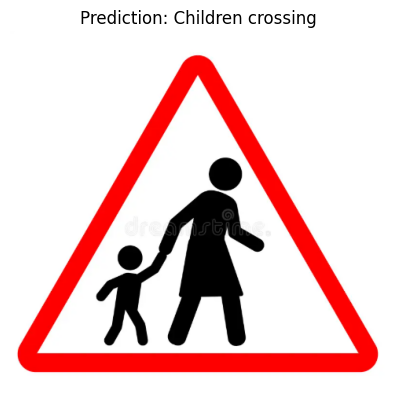

Predicted Class ID: 28
Predicted Class Name: Children crossing


(28, 'Children crossing')

In [37]:
predict_traffic_sign('/kaggle/input/children-google/childdren_google.png',model,classes)

In [38]:
np.save("images.npy", images)
np.save("labels.npy", labels)
model.save("traffic_sign_cnn.h5")
